```
Topic:        Project 1 MTA
Subject:      Exploring changes in MTA data during Yankees Games
Date:         07/05/2020
Group:        Una Bayasgalan, Jacky Lu, Isaac Wang
```

In [7]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
# open the cleaned-up file for analysis
# Note: this file was over 100 MB. Since Github has a 100 MB/file limit, this file was not included in our submission.
with open('pickled_data/yankee_game_kiosk_df.pickle', 'rb') as read_file:
    daily_df = pickle.load(read_file)

In [9]:
# Calculate total activity (entries & exits)
daily_df["TOTAL"] = daily_df["DAILY_ENTRIES"] + daily_df["DAILY_EXITS"]
daily_df.head()

,index,C/A,UNIT,SCP,STATION,DATE,FIRST_ENTRIES,FIRST_EXITS,NEXT_DAY_ENTRIES,NEXT_DAY_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAY_OF_YEAR,HOME_GAME,HAS_KIOSK,TOTAL
0,0,A002,R051,02-00-00,59 ST,03/16/2019,6980704,2367517,6981564.0,2367731.0,860.0,214.0,2019-03-16,NaN,True,1074.0
1,1,A002,R051,02-00-00,59 ST,03/17/2019,6981564,2367731,6982134.0,2367864.0,570.0,133.0,2019-03-17,NaN,True,703.0
2,2,A002,R051,02-00-00,59 ST,03/18/2019,6982134,2367864,6983646.0,2368374.0,1512.0,510.0,2019-03-18,NaN,True,2022.0
3,3,A002,R051,02-00-00,59 ST,03/19/2019,6983646,2368374,6985159.0,2368888.0,1513.0,514.0,2019-03-19,NaN,True,2027.0
4,4,A002,R051,02-00-00,59 ST,03/20/2019,6985159,2368888,6986742.0,2369347.0,1583.0,459.0,2019-03-20,NaN,True,2042.0


In [10]:
# Make a DataFrame for data during Yankee Game Days and stations with kiosks
yankee_game_df = daily_df[(daily_df["HOME_GAME"] == True) & (daily_df["HAS_KIOSK"] == True)]
print(len(yankee_game_df["DATE"].unique())) # This is 81 days worth of data.
yankee_game_df.head()

81


,index,C/A,UNIT,SCP,STATION,DATE,FIRST_ENTRIES,FIRST_EXITS,NEXT_DAY_ENTRIES,NEXT_DAY_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAY_OF_YEAR,HOME_GAME,HAS_KIOSK,TOTAL
12,12,A002,R051,02-00-00,59 ST,03/28/2019,6995928,2372487,6997439.0,2373047.0,1511.0,560.0,2019-03-28,True,True,2071.0
14,14,A002,R051,02-00-00,59 ST,03/30/2019,6999064,2373568,6999957.0,2373867.0,893.0,299.0,2019-03-30,True,True,1192.0
15,15,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,7000528.0,2374095.0,571.0,228.0,2019-03-31,True,True,799.0
16,16,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,7002087.0,2374579.0,1559.0,484.0,2019-04-01,True,True,2043.0
17,17,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,7003680.0,2375133.0,1593.0,554.0,2019-04-02,True,True,2147.0


In [11]:
# Sum the daily entries and exits into total entries, exits, and a grand total.
yankee_game_aggs_df = (yankee_game_df
                  .groupby(["STATION","HAS_KIOSK"],as_index=False)[["DAILY_ENTRIES","DAILY_EXITS"]]
                  .agg({'DAILY_ENTRIES': 'sum', 'DAILY_EXITS': 'sum'})
                 )
yankee_game_aggs_df.rename(columns={"DAILY_ENTRIES":"TOTAL_ENTRIES", "DAILY_EXITS":"TOTAL_EXITS"},inplace=True)
yankee_game_aggs_df["GRAND_TOTAL"] = yankee_game_aggs_df["TOTAL_ENTRIES"] + yankee_game_aggs_df["TOTAL_EXITS"]
# This dataset has total entries & exits from 81 days (Yankee home game dates) worth of data.
# Calculate the average number per day
yankee_game_aggs_df["AVERAGE_PER_DAY"] = yankee_game_aggs_df["GRAND_TOTAL"]/81
yankee_game_aggs_df.head(5)

,STATION,HAS_KIOSK,TOTAL_ENTRIES,TOTAL_EXITS,GRAND_TOTAL,AVERAGE_PER_DAY
0,125 ST,True,5284256.0,4544221.0,9828477.0,121339.222222
1,14 ST,True,4030030.0,3440804.0,7470834.0,92232.518519
2,14 ST-UNION SQ,True,7000089.0,6546641.0,13546730.0,167243.580247
3,145 ST,True,2408947.0,2151279.0,4560226.0,56299.086420
4,149/GRAND CONC,True,848310.0,607950.0,1456260.0,17978.518519


In [12]:
# Make a DataFrame for days when the Yankees didn't have a home game and stations with kiosks
no_game_df = daily_df[(daily_df["HOME_GAME"] != True) & (daily_df["HAS_KIOSK"] == True)]
print(len(no_game_df["DATE"].unique())) # This is 135 days worth of data.
no_game_df.head()

135


,index,C/A,UNIT,SCP,STATION,DATE,FIRST_ENTRIES,FIRST_EXITS,NEXT_DAY_ENTRIES,NEXT_DAY_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAY_OF_YEAR,HOME_GAME,HAS_KIOSK,TOTAL
0,0,A002,R051,02-00-00,59 ST,03/16/2019,6980704,2367517,6981564.0,2367731.0,860.0,214.0,2019-03-16,NaN,True,1074.0
1,1,A002,R051,02-00-00,59 ST,03/17/2019,6981564,2367731,6982134.0,2367864.0,570.0,133.0,2019-03-17,NaN,True,703.0
2,2,A002,R051,02-00-00,59 ST,03/18/2019,6982134,2367864,6983646.0,2368374.0,1512.0,510.0,2019-03-18,NaN,True,2022.0
3,3,A002,R051,02-00-00,59 ST,03/19/2019,6983646,2368374,6985159.0,2368888.0,1513.0,514.0,2019-03-19,NaN,True,2027.0
4,4,A002,R051,02-00-00,59 ST,03/20/2019,6985159,2368888,6986742.0,2369347.0,1583.0,459.0,2019-03-20,NaN,True,2042.0


In [13]:
# Sum the daily entries and exits into total entries, exits, and a grand total.
no_game_aggs_df = (no_game_df
                  .groupby(["STATION","HAS_KIOSK"],as_index=False)[["DAILY_ENTRIES","DAILY_EXITS"]]
                  .agg({'DAILY_ENTRIES': 'sum', 'DAILY_EXITS': 'sum'})
                  )
no_game_aggs_df.rename(columns={"DAILY_ENTRIES":"TOTAL_ENTRIES", "DAILY_EXITS":"TOTAL_EXITS"},inplace=True)
no_game_aggs_df["GRAND_TOTAL"] = no_game_aggs_df["TOTAL_ENTRIES"] + no_game_aggs_df["TOTAL_EXITS"]
# This dataset has total entries & exits from 135 days (dates where Yankee's didn't have a home game)
# Calculate the average number per day
no_game_aggs_df["AVERAGE_PER_DAY"] = no_game_aggs_df["GRAND_TOTAL"]/135
no_game_aggs_df.head()

,STATION,HAS_KIOSK,TOTAL_ENTRIES,TOTAL_EXITS,GRAND_TOTAL,AVERAGE_PER_DAY
0,125 ST,True,9096454.0,7716768.0,16813222.0,124542.385185
1,14 ST,True,7012763.0,5963926.0,12976689.0,96123.622222
2,14 ST-UNION SQ,True,12143228.0,11341964.0,23485192.0,173964.385185
3,145 ST,True,4404734.0,3911360.0,8316094.0,61600.696296
4,149/GRAND CONC,True,1483369.0,979814.0,2463183.0,18245.800000


In [14]:
# Merge the Dataframes to compare GameDay and Non-Game Day averages
merged_df = pd.merge(yankee_game_aggs_df ,no_game_aggs_df, suffixes=("_GAME","_NOGAME"),on=["STATION","HAS_KIOSK"])
merged_df.head()

,STATION,HAS_KIOSK,TOTAL_ENTRIES_GAME,TOTAL_EXITS_GAME,GRAND_TOTAL_GAME,AVERAGE_PER_DAY_GAME,TOTAL_ENTRIES_NOGAME,TOTAL_EXITS_NOGAME,GRAND_TOTAL_NOGAME,AVERAGE_PER_DAY_NOGAME
0,125 ST,True,5284256.0,4544221.0,9828477.0,121339.222222,9096454.0,7716768.0,16813222.0,124542.385185
1,14 ST,True,4030030.0,3440804.0,7470834.0,92232.518519,7012763.0,5963926.0,12976689.0,96123.622222
2,14 ST-UNION SQ,True,7000089.0,6546641.0,13546730.0,167243.580247,12143228.0,11341964.0,23485192.0,173964.385185
3,145 ST,True,2408947.0,2151279.0,4560226.0,56299.086420,4404734.0,3911360.0,8316094.0,61600.696296
4,149/GRAND CONC,True,848310.0,607950.0,1456260.0,17978.518519,1483369.0,979814.0,2463183.0,18245.800000


In [15]:
# Drop unnecessary columns
merged_df.drop(["TOTAL_ENTRIES_GAME", "TOTAL_EXITS_GAME","GRAND_TOTAL_GAME","TOTAL_ENTRIES_NOGAME","TOTAL_EXITS_NOGAME","GRAND_TOTAL_NOGAME"], axis=1, inplace=True)

In [16]:
# Which stations had more entries + exits on game days than on non-game days?
merged_df[merged_df["AVERAGE_PER_DAY_GAME"] > merged_df["AVERAGE_PER_DAY_NOGAME"]]

,STATION,HAS_KIOSK,AVERAGE_PER_DAY_GAME,AVERAGE_PER_DAY_NOGAME
5,161/YANKEE STAD,True,49560.592593,29846.940741
17,5 AVE,True,21355.160494,20312.955556
38,BROADWAY JCT,True,16165.296296,16103.377778


In [17]:
# Calculate data for possible visualization (game/nogame ratio, z-score)
merged_df["GAME_NOGAME_RATIO"] = merged_df["AVERAGE_PER_DAY_GAME"] / merged_df["AVERAGE_PER_DAY_NOGAME"]
merged_df["Z_SCORE"] = (merged_df["GAME_NOGAME_RATIO"] - merged_df["GAME_NOGAME_RATIO"].mean()) / merged_df["GAME_NOGAME_RATIO"].std()
merged_df.sort_values(["GAME_NOGAME_RATIO"],ascending=False).head(10) # only 1 station has a z-score above 2

,STATION,HAS_KIOSK,AVERAGE_PER_DAY_GAME,AVERAGE_PER_DAY_NOGAME,GAME_NOGAME_RATIO,Z_SCORE
5,161/YANKEE STAD,True,49560.592593,29846.940741,1.660492,7.488001
17,5 AVE,True,21355.160494,20312.955556,1.051307,0.903259
38,BROADWAY JCT,True,16165.296296,16103.377778,1.003845,0.390233
58,PRINCE ST,True,23236.975309,23276.577778,0.998299,0.330281
27,81 ST-MUSEUM,True,23132.209877,23290.237037,0.993215,0.275330
24,72 ST,True,75461.308642,76053.266667,0.992217,0.264539
34,BEDFORD AV,True,37129.925926,37424.866667,0.992119,0.263486
29,96 ST,True,99076.395062,99995.333333,0.990810,0.249337
53,METROPOLITAN AV,True,39417.308642,39800.340741,0.990376,0.244646
4,149/GRAND CONC,True,17978.518519,18245.800000,0.985351,0.190329


In [18]:
merged_df.sort_values(["GAME_NOGAME_RATIO"],ascending=False).tail(10)

,STATION,HAS_KIOSK,AVERAGE_PER_DAY_GAME,AVERAGE_PER_DAY_NOGAME,GAME_NOGAME_RATIO,Z_SCORE
32,ATLANTIC AV,True,1874.234568,2013.681481,0.930750,-0.399857
49,GRD CNTRL-42 ST,True,222050.469136,238583.859259,0.930702,-0.400379
43,CLINTON-WASH AV,True,16407.629630,17632.948148,0.930510,-0.402457
37,BROADWAY,True,23923.716049,25723.007407,0.930051,-0.407413
15,47-50 STS ROCK,True,97065.456790,104413.014815,0.929630,-0.411968
6,23 ST,True,161804.938272,174313.540741,0.928241,-0.426983
46,FOREST HILLS 71,True,32715.592593,35408.222222,0.923955,-0.473312
3,145 ST,True,56299.086420,61600.696296,0.913936,-0.581606
50,HUNTERS PT AV,True,9235.148148,10196.007407,0.905761,-0.669967
54,METS-WILLETS PT,True,14217.987654,17465.962963,0.814040,-1.661395


In [19]:
# Get the top 10 stations with highest game/nogame ratios
top_10_ratios = merged_df.sort_values(["GAME_NOGAME_RATIO"],ascending=False).head(10).reset_index()
top_10_ratios.drop(["index"], axis=1, inplace=True)
top_10_ratios[["STATION","HAS_KIOSK","AVERAGE_PER_DAY_GAME","AVERAGE_PER_DAY_NOGAME","GAME_NOGAME_RATIO"]].head(10)

,STATION,HAS_KIOSK,AVERAGE_PER_DAY_GAME,AVERAGE_PER_DAY_NOGAME,GAME_NOGAME_RATIO
0,161/YANKEE STAD,True,49560.592593,29846.940741,1.660492
1,5 AVE,True,21355.160494,20312.955556,1.051307
2,BROADWAY JCT,True,16165.296296,16103.377778,1.003845
3,PRINCE ST,True,23236.975309,23276.577778,0.998299
4,81 ST-MUSEUM,True,23132.209877,23290.237037,0.993215
5,72 ST,True,75461.308642,76053.266667,0.992217
6,BEDFORD AV,True,37129.925926,37424.866667,0.992119
7,96 ST,True,99076.395062,99995.333333,0.990810
8,METROPOLITAN AV,True,39417.308642,39800.340741,0.990376
9,149/GRAND CONC,True,17978.518519,18245.800000,0.985351


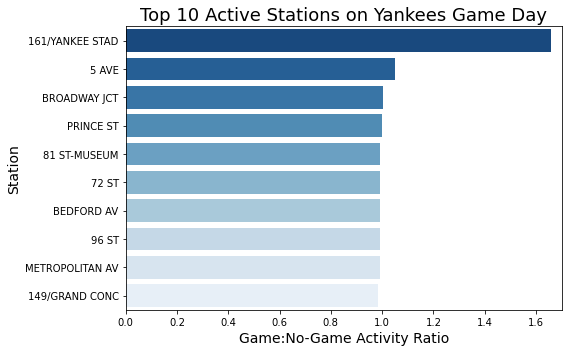

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(x="GAME_NOGAME_RATIO",y="STATION",data=top_10_ratios,palette=sns.color_palette("Blues_r", 10))
plt.title("Top 10 Active Stations on Yankees Game Day", fontsize=18)
plt.xlabel("Game:No-Game Activity Ratio", fontsize=14)
plt.ylabel("Station", fontsize=14)
plt.xlim([0, 1.7])
plt.tight_layout()
plt.savefig("images/top_10_active_stations.png",format='png');

In [21]:
# Get the bottom 10 stations with lowest game/nogame ratios
bottom_10_ratios = merged_df.sort_values(["GAME_NOGAME_RATIO"],ascending=False).tail(10).reset_index()
bottom_10_ratios.head()

,index,STATION,HAS_KIOSK,AVERAGE_PER_DAY_GAME,AVERAGE_PER_DAY_NOGAME,GAME_NOGAME_RATIO,Z_SCORE
0,32,ATLANTIC AV,True,1874.234568,2013.681481,0.930750,-0.399857
1,49,GRD CNTRL-42 ST,True,222050.469136,238583.859259,0.930702,-0.400379
2,43,CLINTON-WASH AV,True,16407.629630,17632.948148,0.930510,-0.402457
3,37,BROADWAY,True,23923.716049,25723.007407,0.930051,-0.407413
4,15,47-50 STS ROCK,True,97065.456790,104413.014815,0.929630,-0.411968


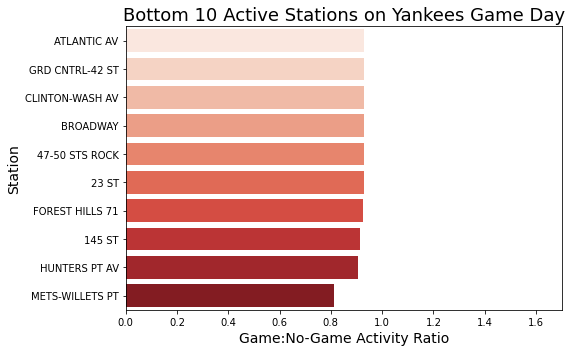

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x="GAME_NOGAME_RATIO",y="STATION",data=bottom_10_ratios,palette=sns.color_palette("Reds", 10))
plt.title("Bottom 10 Active Stations on Yankees Game Day", fontsize=18)
plt.xlabel("Game:No-Game Activity Ratio", fontsize=14)
plt.ylabel("Station", fontsize=14)
plt.xlim([0, 1.7])
plt.tight_layout()
plt.savefig("images/bottom_10_active_stations.png",format='png');

In [23]:
# Calculate data for just Yankee stadium on game day
yankee_stadium_game_df = yankee_game_df[yankee_game_df["STATION"] == "161/YANKEE STAD"].copy()
yankee_stadium_game_df["TOTAL"] = yankee_stadium_game_df["DAILY_ENTRIES"] + yankee_stadium_game_df["DAILY_EXITS"]
yankee_stadium_game_df = yankee_stadium_game_df.groupby(["DAY_OF_YEAR"])[["TOTAL"]].sum().reset_index()
yankee_stadium_game_df.describe() # get min and max to set limits on x-axis for plotting

,TOTAL
count,81.000000
mean,49560.592593
std,10038.956711
min,24638.000000
25%,43465.000000
50%,50461.000000
75%,56117.000000
max,77574.000000


In [24]:
# Calculate data for just Yankee stadium on non-game day
yankee_stadium_no_game_df = no_game_df[no_game_df["STATION"] == "161/YANKEE STAD"].copy()
yankee_stadium_no_game_df["TOTAL"] = yankee_stadium_no_game_df["DAILY_ENTRIES"] + yankee_stadium_no_game_df["DAILY_EXITS"]
yankee_stadium_no_game_df = yankee_stadium_no_game_df.groupby(["DAY_OF_YEAR"])["TOTAL"].sum().reset_index()
yankee_stadium_no_game_df.describe()

,TOTAL
count,135.000000
mean,29846.940741
std,7646.476828
min,12217.000000
25%,27239.000000
50%,31804.000000
75%,32982.500000
max,60924.000000


In [25]:
# Get DataFrame for Yankee Stadium Game Day histogram
yankee_game_mask = (daily_df["HOME_GAME"] == True) & (daily_df["STATION"] == "161/YANKEE STAD")
yankee_game_hist_df = daily_df[yankee_game_mask].groupby(["DAY_OF_YEAR"])[["TOTAL"]].sum().reset_index()
yankee_game_hist_df.head()

,DAY_OF_YEAR,TOTAL
0,2019-03-28,57827.0
1,2019-03-30,44694.0
2,2019-03-31,29304.0
3,2019-04-01,47007.0
4,2019-04-02,48069.0


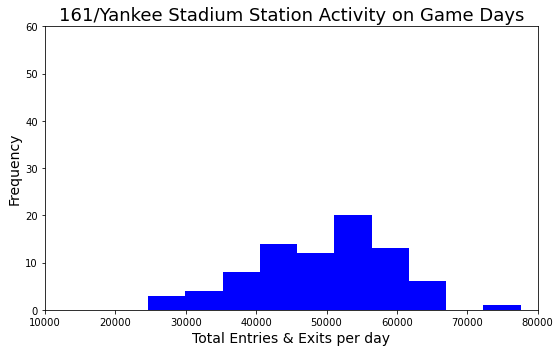

In [26]:
plt.figure(figsize=(8,5))
plt.hist(x="TOTAL", data=yankee_game_hist_df, color="b", label="Game Day")
plt.title("161/Yankee Stadium Station Activity on Game Days", fontsize=18)
plt.xlabel("Total Entries & Exits per day", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.xlim([10000,80000])
plt.ylim([0,60])
plt.savefig("images/yankee_stadium_game_hist.png",format='png');

In [27]:
# Get DataFrame for Yankee Stadium Non-Game Day histogram
yankee_no_game_mask = (daily_df["HOME_GAME"] != True) & (daily_df["STATION"] == "161/YANKEE STAD")
yankee_no_game_hist_df = daily_df[yankee_no_game_mask].groupby(["DAY_OF_YEAR"])[["TOTAL"]].sum().reset_index()
yankee_no_game_hist_df.head()

,DAY_OF_YEAR,TOTAL
0,2019-03-16,19296.0
1,2019-03-17,23181.0
2,2019-03-18,32057.0
3,2019-03-19,32515.0
4,2019-03-20,33462.0


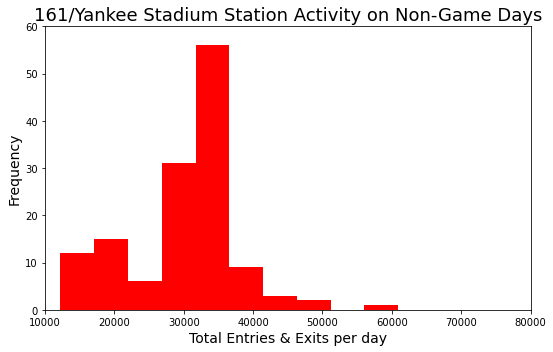

In [28]:
plt.figure(figsize=(8,5))
plt.hist(x="TOTAL", data=yankee_no_game_hist_df, color='r', label="Non-Game Day")
plt.title("161/Yankee Stadium Station Activity on Non-Game Days", fontsize=18)
plt.xlabel("Total Entries & Exits per day", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.xlim([10000,80000])
plt.ylim([0,60])
plt.savefig("images/yankee_stadium_no_game_hist.png",format='png');

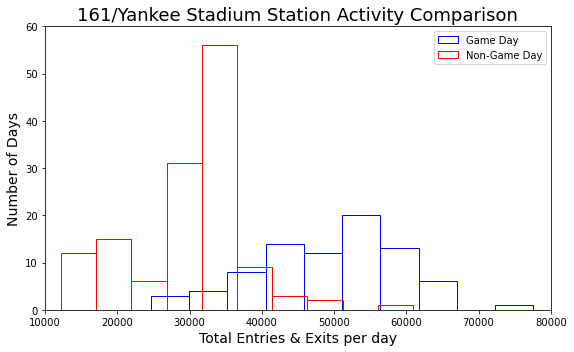

In [29]:
# Plot both histograms to compare Game Day and Non-Game Day data
plt.figure(figsize=(8,5))
plt.hist(x="TOTAL", data=yankee_game_hist_df, edgecolor="b", fill=False, label="Game Day")
plt.hist(x="TOTAL", data=yankee_no_game_hist_df, edgecolor='r', fill=False, label="Non-Game Day")
plt.title("161/Yankee Stadium Station Activity Comparison", fontsize=18)
plt.xlabel("Total Entries & Exits per day", fontsize=14)
plt.ylabel("Number of Days", fontsize=14)
plt.tight_layout()
plt.legend()
plt.xlim([10000,80000])
plt.ylim([0,60])
plt.savefig("images/yankee_stadium_combined_hist.png",format='png');

Here, we want to make a grouped violintplot with split violins to visually see what the distribution of entries/exits for game day vs. non game day look like.

Each violin will represent a station.
The split will be between game days and non-game days.

In [30]:
violin_df = daily_df.copy()
violin_df["HOME_GAME"].fillna(False, inplace=True)
violin_df = violin_df.groupby(["STATION","DAY_OF_YEAR","HOME_GAME"])[["TOTAL"]].sum().reset_index()
violin_df.head()

,STATION,DAY_OF_YEAR,HOME_GAME,TOTAL
0,1 AV,2019-03-16,False,221.0
1,1 AV,2019-03-17,False,136.0
2,1 AV,2019-03-18,False,38474.0
3,1 AV,2019-03-19,False,40968.0
4,1 AV,2019-03-20,False,42276.0


In [31]:
# Pick 5 arbitrary stations (one should be Yankee Stadium) to show violin plots
violin_stations = ["161/YANKEE STAD","BROADWAY JCT","PRINCE ST","81 ST-MUSEUM", "149/GRAND CONC"]
violin_df = violin_df[violin_df["STATION"].isin(violin_stations)]
violin_df.sample(5)

,STATION,DAY_OF_YEAR,HOME_GAME,TOTAL
4575,161/YANKEE STAD,2019-04-25,False,31103.0
69273,PRINCE ST,2019-05-26,False,18509.0
3550,149/GRAND CONC,2019-06-19,True,20304.0
35493,BROADWAY JCT,2019-06-14,False,17723.0
4748,161/YANKEE STAD,2019-10-15,True,60842.0


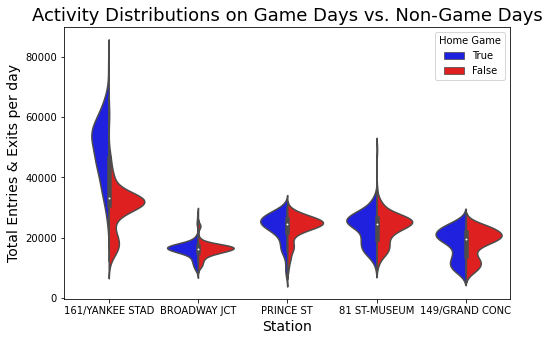

In [32]:
plt.figure(figsize=(8,5))
v = sns.violinplot(x="STATION", y="TOTAL", hue="HOME_GAME",
               split=True,
               order = ["161/YANKEE STAD","BROADWAY JCT","PRINCE ST","81 ST-MUSEUM", "149/GRAND CONC"],
               hue_order = [True, False],
               data=violin_df,
               palette={True:'b',False:'r'},
               legend=False
              )
v.set_xticklabels(v.get_xticklabels())
plt.title("Activity Distributions on Game Days vs. Non-Game Days", fontsize=18)
plt.xlabel("Station", fontsize=14)
plt.ylabel("Total Entries & Exits per day", fontsize=14)
plt.legend(title="Home Game", loc="upper right")
plt.savefig("images/yankee_violin_plots.png",format='png');